# Import

In [ ]:
!pip install --upgrade pandas

In [1]:
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime

# Data Load

In [2]:
data_path = '../../data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

# 메타 데이터들
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# Train Data

In [3]:
train_df.info(show_counts=True)

TypeError: info() got an unexpected keyword argument 'show_counts'

In [4]:
train_df.nunique()

user      31360
item       6807
time    5074973
dtype: int64

In [5]:
print("Data sparsity ratio: ", np.round(1 - len(train_df) / (train_df['user'].nunique() * train_df['item'].nunique()), 4))

Data sparsity ratio:  0.9759


In [6]:
True in train_df[['user', 'item']].duplicated()
# 유저-아이템 상호작용에 중복값이 없다... => 유사한 방식으로 테스트 데이터를 설정했다면, 이미 시청한 영화는 추천 대상에서 제외해도 되지 않을까?

False

In [5]:
train_df['user'].value_counts().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: user, dtype: float64

<AxesSubplot: >

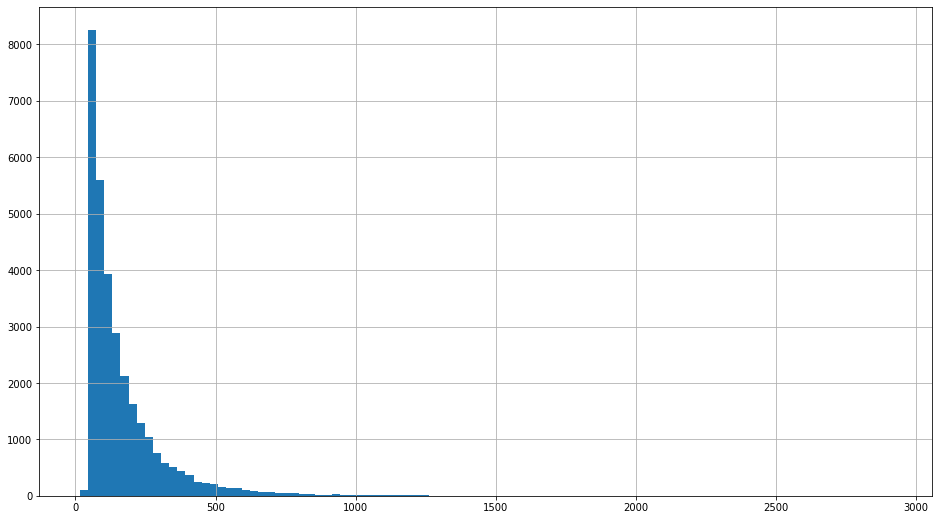

In [8]:
train_df['user'].value_counts().hist(bins=100, figsize=(16,9))

In [8]:
train_df['item'].value_counts().describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
Name: item, dtype: float64

<AxesSubplot: >

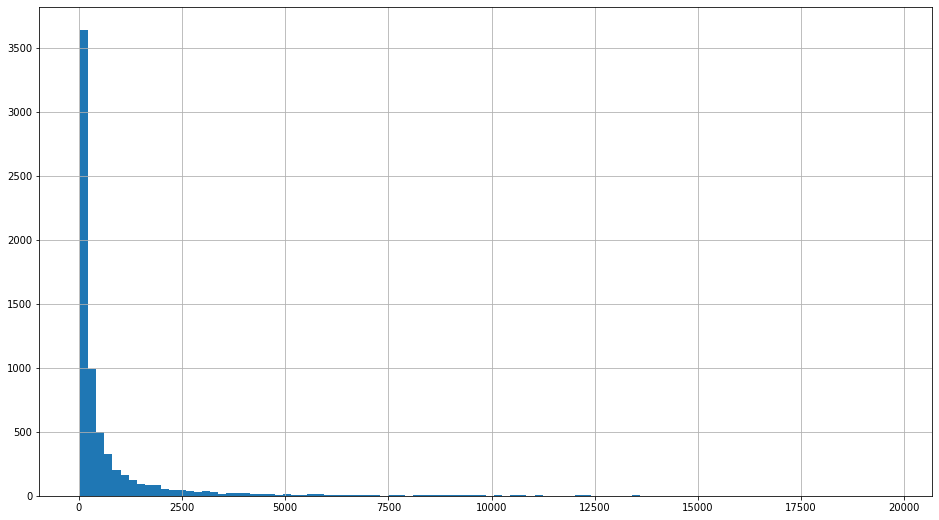

In [10]:
train_df['item'].value_counts().hist(bins=100, figsize=(16,9))

In [11]:
train_df['date'] = train_df['time'].apply(lambda x: datetime.fromtimestamp(x))

In [12]:
#train_df['date'].apply(lambda x: x.year)    # year, month, day, hour, minute, second
train_df['ym'] = train_df['date'].apply(lambda x: int(x.strftime('%Y%m')))

<AxesSubplot: >

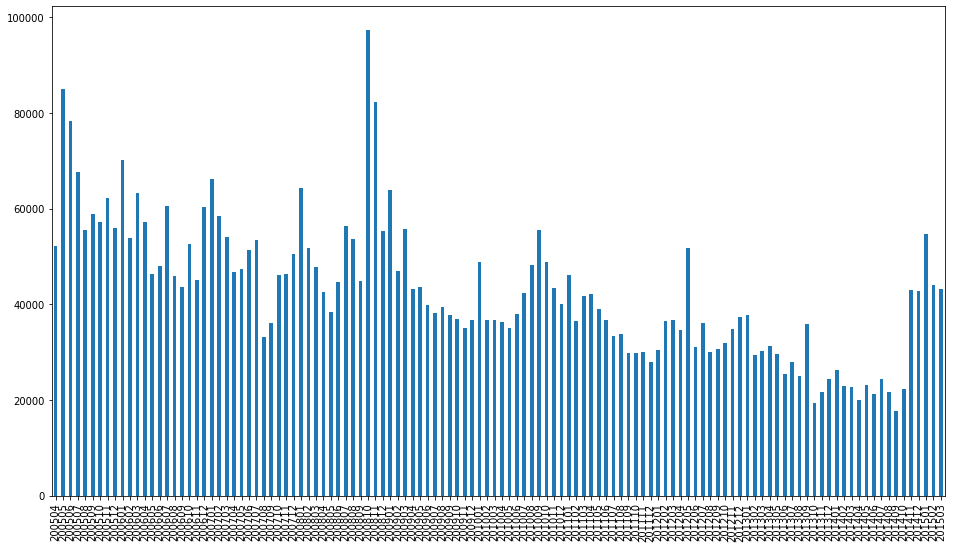

In [13]:
train_df['ym'].value_counts().sort_index().plot.bar(figsize=(16,9))

# Meta Data

In [14]:
# 메타 데이터의 기록 수, 아이템 수 비교
print("train_df['item'].nunique(): ", train_df['item'].nunique())
print("year_data: ", year_data.shape[0], ',', year_data['item'].nunique())
print("writer_data: ", writer_data.shape[0], ',', writer_data['item'].nunique())
print("title_data: ", title_data.shape[0], ',', title_data['item'].nunique())
print("genre_data: ", genre_data.shape[0], ',', genre_data['item'].nunique())
print("director_data: ", director_data.shape[0], ',', director_data['item'].nunique())

train_df['item'].nunique():  6807
year_data:  6799 , 6799
writer_data:  11306 , 5648
title_data:  6807 , 6807
genre_data:  15933 , 6807
director_data:  5905 , 5503


In [15]:
# 메타 데이터의 차원 수 비교
print("year_data: ", year_data['year'].nunique())
print("writer_data: ", writer_data['writer'].nunique())
print("title_data: ", title_data['title'].nunique())    
print("genre_data: ", genre_data['genre'].nunique())
print("director_data: ", director_data['item'].nunique())

year_data:  93
writer_data:  2989
title_data:  6806
genre_data:  18
director_data:  5503


In [9]:
year_data['year'].value_counts().describe()

count     93.000000
mean      73.107527
std       78.501656
min        2.000000
25%       19.000000
50%       37.000000
75%      100.000000
max      284.000000
Name: year, dtype: float64

In [10]:
writer_data['writer'].value_counts().describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

In [11]:
title_data['title'].value_counts().describe()

count    6806.000000
mean        1.000147
std         0.012121
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: title, dtype: float64

In [12]:
genre_data['genre'].value_counts().describe()

count      18.000000
mean      885.166667
std       866.208252
min        97.000000
25%       348.250000
50%       579.500000
75%      1165.500000
max      3490.000000
Name: genre, dtype: float64

In [13]:
director_data['director'].value_counts().describe()

count    1340.000000
mean        4.406716
std         3.633030
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        44.000000
Name: director, dtype: float64

In [21]:
# writer와 director에 겹치는 값 존재
set(writer_data['writer']) & set(director_data['director'])

{'nm0000005',
 'nm0000019',
 'nm0000033',
 'nm0000036',
 'nm0000040',
 'nm0000041',
 'nm0000045',
 'nm0000059',
 'nm0000076',
 'nm0000080',
 'nm0000095',
 'nm0000108',
 'nm0000110',
 'nm0000114',
 'nm0000116',
 'nm0000118',
 'nm0000122',
 'nm0000123',
 'nm0000127',
 'nm0000154',
 'nm0000158',
 'nm0000165',
 'nm0000180',
 'nm0000184',
 'nm0000186',
 'nm0000209',
 'nm0000217',
 'nm0000229',
 'nm0000230',
 'nm0000231',
 'nm0000233',
 'nm0000247',
 'nm0000255',
 'nm0000264',
 'nm0000265',
 'nm0000269',
 'nm0000316',
 'nm0000318',
 'nm0000320',
 'nm0000329',
 'nm0000338',
 'nm0000339',
 'nm0000341',
 'nm0000343',
 'nm0000345',
 'nm0000361',
 'nm0000382',
 'nm0000386',
 'nm0000389',
 'nm0000416',
 'nm0000419',
 'nm0000425',
 'nm0000428',
 'nm0000436',
 'nm0000455',
 'nm0000464',
 'nm0000466',
 'nm0000484',
 'nm0000485',
 'nm0000487',
 'nm0000490',
 'nm0000500',
 'nm0000517',
 'nm0000519',
 'nm0000520',
 'nm0000540',
 'nm0000559',
 'nm0000570',
 'nm0000576',
 'nm0000581',
 'nm0000583',
 'nm00

# Merge

In [14]:
year_df = pd.merge(train_df, year_data, on=['item'], how='left')
writer_df = pd.merge(train_df, writer_data, on=['item'], how='left')
title_df = pd.merge(train_df, title_data, on=['item'], how='left')
genre_df = pd.merge(train_df, genre_data, on=['item'], how='left')
director_df = pd.merge(train_df, director_data, on=['item'], how='left')

In [23]:
year_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   user    5154471 non-null  int64         
 1   item    5154471 non-null  int64         
 2   time    5154471 non-null  int64         
 3   date    5154471 non-null  datetime64[ns]
 4   ym      5154471 non-null  int64         
 5   year    5152639 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 275.3 MB


In [15]:
year_df['year'].value_counts().describe()

count        93.00000
mean      55404.72043
std       70794.90892
min         352.00000
25%        6576.00000
50%       20068.00000
75%       77586.00000
max      272242.00000
Name: year, dtype: float64

In [25]:
writer_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11591607 entries, 0 to 11591606
Data columns (total 6 columns):
 #   Column  Non-Null Count     Dtype         
---  ------  --------------     -----         
 0   user    11591607 non-null  int64         
 1   item    11591607 non-null  int64         
 2   time    11591607 non-null  int64         
 3   date    11591607 non-null  datetime64[ns]
 4   ym      11591607 non-null  int64         
 5   writer  11278915 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 619.1+ MB


In [26]:
writer_df['writer'].value_counts().describe()

nm0000184    96994
nm0000233    80361
nm0634240    64298
nm0001392    60938
nm0909638    60245
             ...  
nm0788454       99
nm0921631       96
nm0540532       94
nm0639434       94
nm0818746       85
Name: writer, Length: 2989, dtype: int64

In [27]:
title_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   user    5154471 non-null  int64         
 1   item    5154471 non-null  int64         
 2   time    5154471 non-null  int64         
 3   date    5154471 non-null  datetime64[ns]
 4   ym      5154471 non-null  int64         
 5   title   5154471 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 275.3+ MB


In [28]:
title_df['title'].value_counts().describe()

Matrix, The (1999)                   19699
Fight Club (1999)                    18437
Pulp Fiction (1994)                  18202
Shawshank Redemption, The (1994)     18168
Forrest Gump (1994)                  17339
                                     ...  
You Got Served (2004)                   38
NeverEnding Story III, The (1994)       36
Baby Geniuses (1999)                    34
Pokémon 3: The Movie (2001)             34
"Great Performances" Cats (1998)        27
Name: title, Length: 6806, dtype: int64

In [29]:
genre_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14126324 entries, 0 to 14126323
Data columns (total 6 columns):
 #   Column  Non-Null Count     Dtype         
---  ------  --------------     -----         
 0   user    14126324 non-null  int64         
 1   item    14126324 non-null  int64         
 2   time    14126324 non-null  int64         
 3   date    14126324 non-null  datetime64[ns]
 4   ym      14126324 non-null  int64         
 5   genre   14126324 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 754.4+ MB


In [30]:
genre_df['genre'].value_counts().describe()

Drama          2511407
Comedy         1719017
Action         1504902
Thriller       1435678
Adventure      1203283
Crime          1014480
Romance         893843
Sci-Fi          857851
Fantasy         617807
Mystery         493005
Children        397929
Animation       370761
Horror          343730
War             307170
Musical         199635
Western          95374
Documentary      90050
Film-Noir        70402
Name: genre, dtype: int64

In [31]:
director_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5708953 entries, 0 to 5708952
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   user      5708953 non-null  int64         
 1   item      5708953 non-null  int64         
 2   time      5708953 non-null  int64         
 3   date      5708953 non-null  datetime64[ns]
 4   ym        5708953 non-null  int64         
 5   director  5407508 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 304.9+ MB


In [32]:
director_df['director'].value_counts().describe()

nm0000229    130434
nm0000233     81880
nm0634240     65526
nm0000709     63374
nm0001392     60938
              ...  
nm0070159       103
nm0788454        99
nm0001674        97
nm0443181        96
nm0921631        96
Name: director, Length: 1340, dtype: int64